In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats

# Load the Excel file into a DataFrame
data = pd.read_excel('BlinkIT Grocery Data.xlsx')

# Display the first few rows to inspect the data
print(data.head())


  Item Fat Content Item Identifier              Item Type  \
0          Regular           FDX32  Fruits and Vegetables   
1          Low Fat           NCB42     Health and Hygiene   
2          Regular           FDR28           Frozen Foods   
3          Regular           FDL50                 Canned   
4          Low Fat           DRI25            Soft Drinks   

   Outlet Establishment Year Outlet Identifier Outlet Location Type  \
0                       2012            OUT049               Tier 1   
1                       2022            OUT018               Tier 3   
2                       2016            OUT046               Tier 1   
3                       2014            OUT013               Tier 3   
4                       2015            OUT045               Tier 2   

  Outlet Size        Outlet Type  Item Visibility  Item Weight     Sales  \
0      Medium  Supermarket Type1         0.100014        15.10  145.4786   
1      Medium  Supermarket Type2         0.008596     

In [104]:
# Step 1: Handle missing values
print(data.isnull().sum())
data = data.dropna()
data

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64


,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8241,reg,FDH26,Canned,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.034841,19.25,141.1496,4.0
8242,reg,FDG56,Fruits and Vegetables,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.071744,13.30,59.7536,4.0
8243,reg,FDM15,Meat,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.057655,11.80,152.6366,4.0
8244,reg,FDX57,Snack Foods,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.047459,17.25,95.8068,4.0


In [105]:
# Step 2: Convert relevant columns to appropriate data types
data['Outlet Establishment Year'] = pd.to_datetime(data['Outlet Establishment Year'], format='%Y', errors='coerce')
data['Sales'] = pd.to_numeric(data['Sales'], errors='coerce')
data.dropna(inplace=True)
data

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012-01-01,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022-01-01,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016-01-01,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014-01-01,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015-01-01,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8241,reg,FDH26,Canned,2022-01-01,OUT018,Tier 3,Medium,Supermarket Type2,0.034841,19.25,141.1496,4.0
8242,reg,FDG56,Fruits and Vegetables,2022-01-01,OUT018,Tier 3,Medium,Supermarket Type2,0.071744,13.30,59.7536,4.0
8243,reg,FDM15,Meat,2022-01-01,OUT018,Tier 3,Medium,Supermarket Type2,0.057655,11.80,152.6366,4.0
8244,reg,FDX57,Snack Foods,2022-01-01,OUT018,Tier 3,Medium,Supermarket Type2,0.047459,17.25,95.8068,4.0


In [106]:
# Step 3: Create new features (e.g., day of the year for trend modeling)
data['Day'] = data['Outlet Establishment Year'].dt.dayofyear
data

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating,Day
0,Regular,FDX32,Fruits and Vegetables,2012-01-01,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0,1
1,Low Fat,NCB42,Health and Hygiene,2022-01-01,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0,1
2,Regular,FDR28,Frozen Foods,2016-01-01,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0,1
3,Regular,FDL50,Canned,2014-01-01,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0,1
4,Low Fat,DRI25,Soft Drinks,2015-01-01,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8241,reg,FDH26,Canned,2022-01-01,OUT018,Tier 3,Medium,Supermarket Type2,0.034841,19.25,141.1496,4.0,1
8242,reg,FDG56,Fruits and Vegetables,2022-01-01,OUT018,Tier 3,Medium,Supermarket Type2,0.071744,13.30,59.7536,4.0,1
8243,reg,FDM15,Meat,2022-01-01,OUT018,Tier 3,Medium,Supermarket Type2,0.057655,11.80,152.6366,4.0,1
8244,reg,FDX57,Snack Foods,2022-01-01,OUT018,Tier 3,Medium,Supermarket Type2,0.047459,17.25,95.8068,4.0,1


In [107]:
# Step 4: Remove outliers using Z-score method (optional)
z_scores = np.abs(stats.zscore(data['Sales']))
data = data[z_scores < 3]  # Keep only data with z-score < 3
data

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating,Day
0,Regular,FDX32,Fruits and Vegetables,2012-01-01,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0,1
1,Low Fat,NCB42,Health and Hygiene,2022-01-01,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0,1
2,Regular,FDR28,Frozen Foods,2016-01-01,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0,1
3,Regular,FDL50,Canned,2014-01-01,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0,1
4,Low Fat,DRI25,Soft Drinks,2015-01-01,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8241,reg,FDH26,Canned,2022-01-01,OUT018,Tier 3,Medium,Supermarket Type2,0.034841,19.25,141.1496,4.0,1
8242,reg,FDG56,Fruits and Vegetables,2022-01-01,OUT018,Tier 3,Medium,Supermarket Type2,0.071744,13.30,59.7536,4.0,1
8243,reg,FDM15,Meat,2022-01-01,OUT018,Tier 3,Medium,Supermarket Type2,0.057655,11.80,152.6366,4.0,1
8244,reg,FDX57,Snack Foods,2022-01-01,OUT018,Tier 3,Medium,Supermarket Type2,0.047459,17.25,95.8068,4.0,1


In [108]:
# Step 5: Confirm data cleaning
print(data.describe())
print(data.isnull().sum())
data

           Outlet Establishment Year  Item Visibility  Item Weight  \
count                           7060      7060.000000  7060.000000   
mean   2016-02-17 13:39:19.886685184         0.063963    12.857645   
min              2011-01-01 00:00:00         0.000000     4.555000   
25%              2014-01-01 00:00:00         0.026768     8.773750   
50%              2016-01-01 00:00:00         0.052493    12.600000   
75%              2020-01-01 00:00:00         0.092774    16.850000   
max              2022-01-01 00:00:00         0.311090    21.350000   
std                              NaN         0.048625     4.643456   

             Sales       Rating     Day  
count  7060.000000  7060.000000  7060.0  
mean    141.240685     3.965382     1.0  
min      31.490000     1.000000     1.0  
25%      94.143600     4.000000     1.0  
50%     142.729900     4.000000     1.0  
75%     186.024000     4.200000     1.0  
max     266.888400     5.000000     1.0  
std      62.411888     0.610523  

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating,Day
0,Regular,FDX32,Fruits and Vegetables,2012-01-01,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0,1
1,Low Fat,NCB42,Health and Hygiene,2022-01-01,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0,1
2,Regular,FDR28,Frozen Foods,2016-01-01,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0,1
3,Regular,FDL50,Canned,2014-01-01,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0,1
4,Low Fat,DRI25,Soft Drinks,2015-01-01,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8241,reg,FDH26,Canned,2022-01-01,OUT018,Tier 3,Medium,Supermarket Type2,0.034841,19.25,141.1496,4.0,1
8242,reg,FDG56,Fruits and Vegetables,2022-01-01,OUT018,Tier 3,Medium,Supermarket Type2,0.071744,13.30,59.7536,4.0,1
8243,reg,FDM15,Meat,2022-01-01,OUT018,Tier 3,Medium,Supermarket Type2,0.057655,11.80,152.6366,4.0,1
8244,reg,FDX57,Snack Foods,2022-01-01,OUT018,Tier 3,Medium,Supermarket Type2,0.047459,17.25,95.8068,4.0,1


In [109]:
# Standardize the 'Item Fat Content' column to have only "Low Fat" and "Regular"
data['Item Fat Content'] = data['Item Fat Content'].replace({
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular',
    'Low Fat': 'Low Fat',
    'Regular': 'Regular'
})

# Check for any null values in the entire dataset
print("Null values in the dataset before dropping:")
print(data.isnull().sum())

# Drop rows with any null values
data = data.dropna()

# To check no more null values
print("\nNull values in the dataset after dropping:")
print(data.isnull().sum())

# first few rows to verify changes
print("\nFirst few rows of the cleaned data:")
print(data.head())


Null values in the dataset before dropping:
Item Fat Content             0
Item Identifier              0
Item Type                    0
Outlet Establishment Year    0
Outlet Identifier            0
Outlet Location Type         0
Outlet Size                  0
Outlet Type                  0
Item Visibility              0
Item Weight                  0
Sales                        0
Rating                       0
Day                          0
dtype: int64

Null values in the dataset after dropping:
Item Fat Content             0
Item Identifier              0
Item Type                    0
Outlet Establishment Year    0
Outlet Identifier            0
Outlet Location Type         0
Outlet Size                  0
Outlet Type                  0
Item Visibility              0
Item Weight                  0
Sales                        0
Rating                       0
Day                          0
dtype: int64

First few rows of the cleaned data:
  Item Fat Content Item Identifier         

In [110]:
# Check the columns in the DataFrame
print(data.columns)


Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating', 'Day'],
      dtype='object')


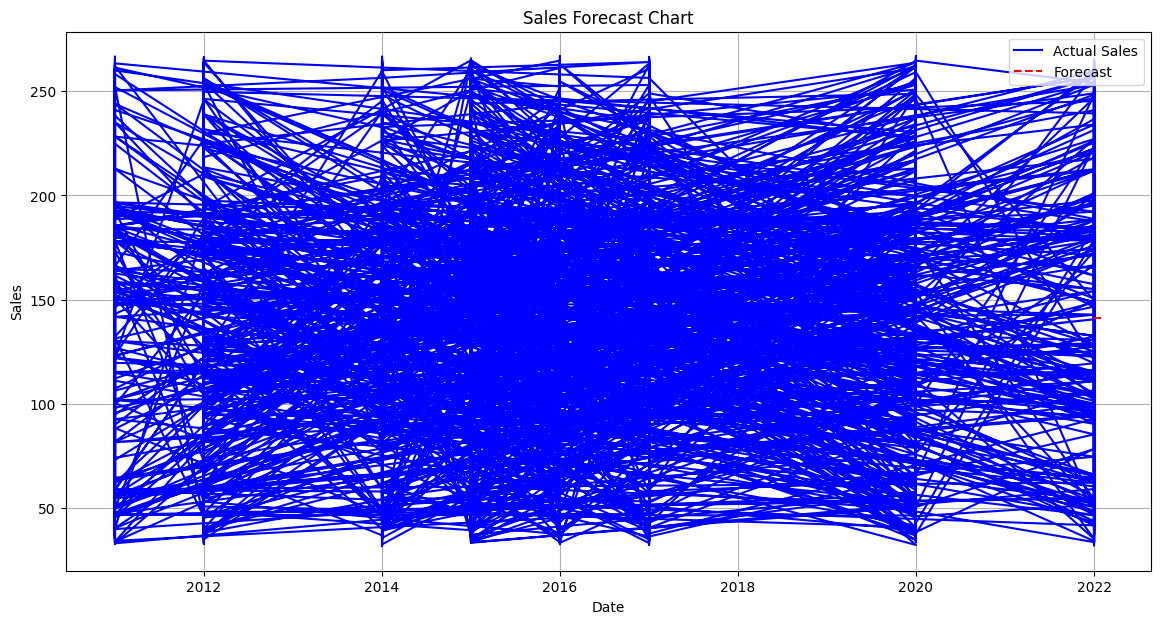

In [111]:
# Define features and target variable
X = data[['Day']]  # Use 'Day' as the feature
y = data['Sales']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Ensure the date column is correctly identified
date_column = 'Outlet Establishment Year'  # Replace this with the correct column name from data.columns if needed

# Generate predictions for future dates (e.g., next 30 days)
future_days = pd.DataFrame({'Day': range(data['Day'].max() + 1, data['Day'].max() + 1 + 30)})

# Convert 'Day' to int for consistency
future_days['Day'] = future_days['Day'].astype(int)

# Make predictions
future_predictions = model.predict(future_days)

# Convert 'Day' values to datetime format for plotting
future_dates = pd.date_range(start=data[date_column].max() + pd.Timedelta(days=1), periods=30, freq='D')

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(data[date_column], data['Sales'], label='Actual Sales', color='blue')  # Plot actual data
plt.plot(future_dates, future_predictions, label='Forecast', linestyle='--', color='red')  # Plot forecast

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast Chart')
plt.legend()
plt.grid()
plt.show()




In [112]:
# Save the cleaned data to CSV
data.to_csv('cleaned_blinkit_data.csv', index=False)
data.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating,Day
0,Regular,FDX32,Fruits and Vegetables,2012-01-01,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0,1
1,Low Fat,NCB42,Health and Hygiene,2022-01-01,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0,1
2,Regular,FDR28,Frozen Foods,2016-01-01,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0,1
3,Regular,FDL50,Canned,2014-01-01,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0,1
4,Low Fat,DRI25,Soft Drinks,2015-01-01,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0,1


In [113]:
from google.colab import files

# Save the cleaned data to CSV
data.to_csv('cleaned_blinkit_data.csv', index=False)

# Download the CSV file
files.download('cleaned_blinkit_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [114]:
# Display basic statistics for numeric columns
print(data.describe())


           Outlet Establishment Year  Item Visibility  Item Weight  \
count                           7060      7060.000000  7060.000000   
mean   2016-02-17 13:39:19.886685184         0.063963    12.857645   
min              2011-01-01 00:00:00         0.000000     4.555000   
25%              2014-01-01 00:00:00         0.026768     8.773750   
50%              2016-01-01 00:00:00         0.052493    12.600000   
75%              2020-01-01 00:00:00         0.092774    16.850000   
max              2022-01-01 00:00:00         0.311090    21.350000   
std                              NaN         0.048625     4.643456   

             Sales       Rating     Day  
count  7060.000000  7060.000000  7060.0  
mean    141.240685     3.965382     1.0  
min      31.490000     1.000000     1.0  
25%      94.143600     4.000000     1.0  
50%     142.729900     4.000000     1.0  
75%     186.024000     4.200000     1.0  
max     266.888400     5.000000     1.0  
std      62.411888     0.610523  

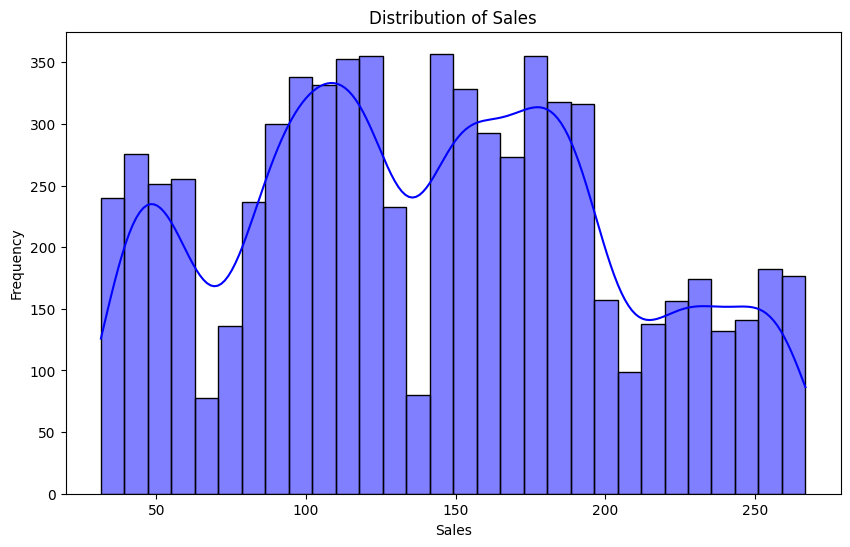

In [115]:
import seaborn as sns

# Histogram of Sales data
plt.figure(figsize=(10, 6))
sns.histplot(data['Sales'], bins=30, kde=True, color='blue')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


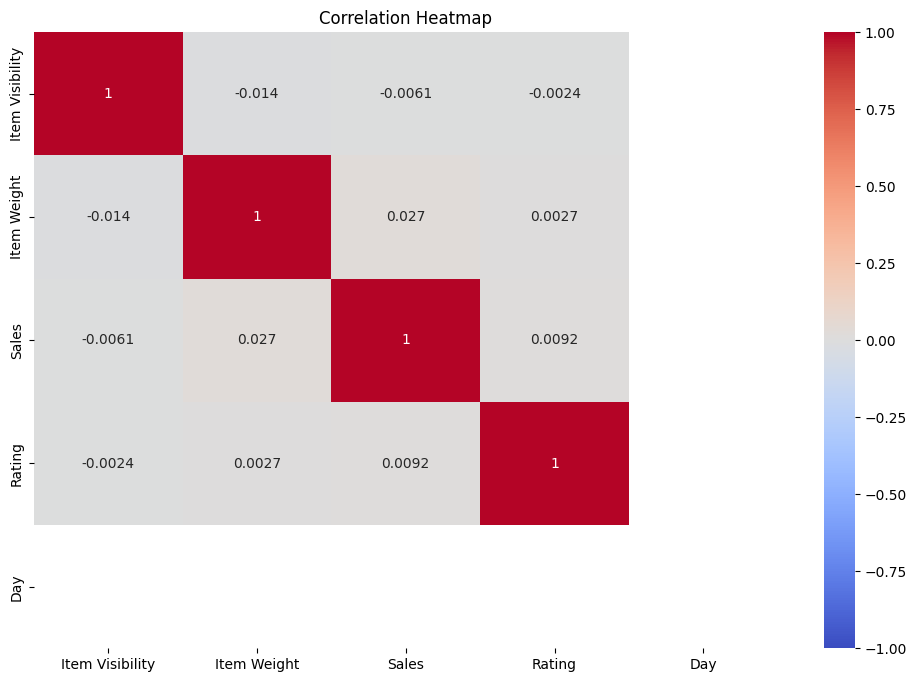

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # import pandas if not already imported

# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['number']) # Select only numeric columns

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1) # Use numeric_data for correlation
plt.title('Correlation Heatmap')
plt.show()

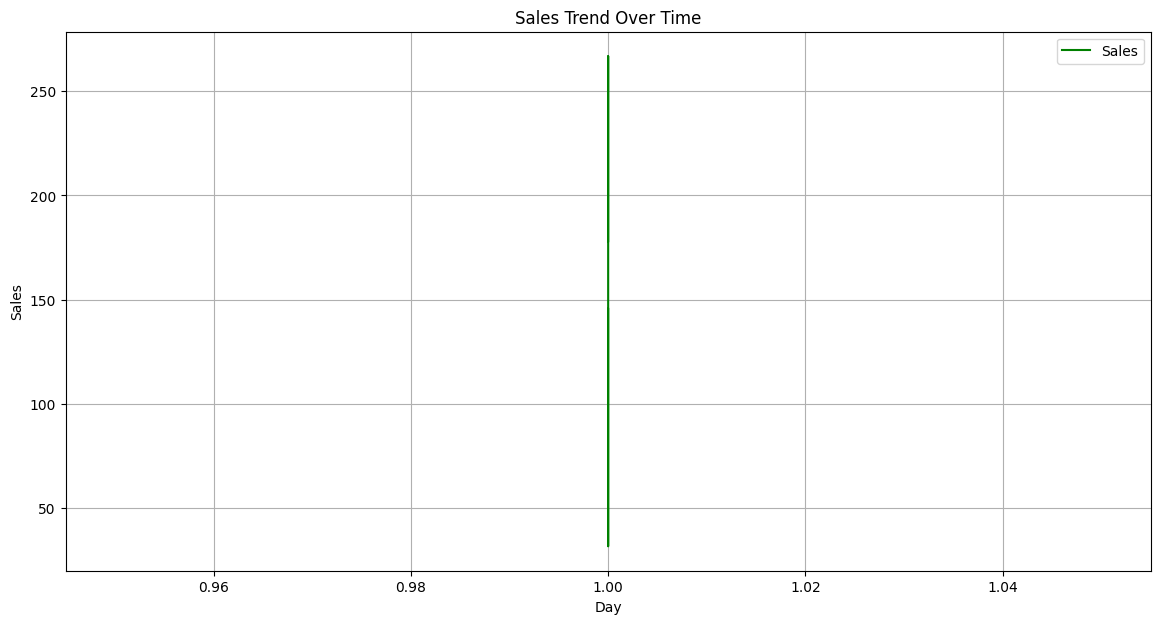

In [117]:
# Plotting sales over time
plt.figure(figsize=(14, 7))
plt.plot(data['Day'], data['Sales'], color='green', label='Sales')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.title('Sales Trend Over Time')
plt.legend()
plt.grid()
plt.show()


<ipython-input-118-ef2e4981ee02>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Item Type', y='Sales', data=data, ci=None, palette='viridis')
<ipython-input-118-ef2e4981ee02>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Item Type', y='Sales', data=data, ci=None, palette='viridis')


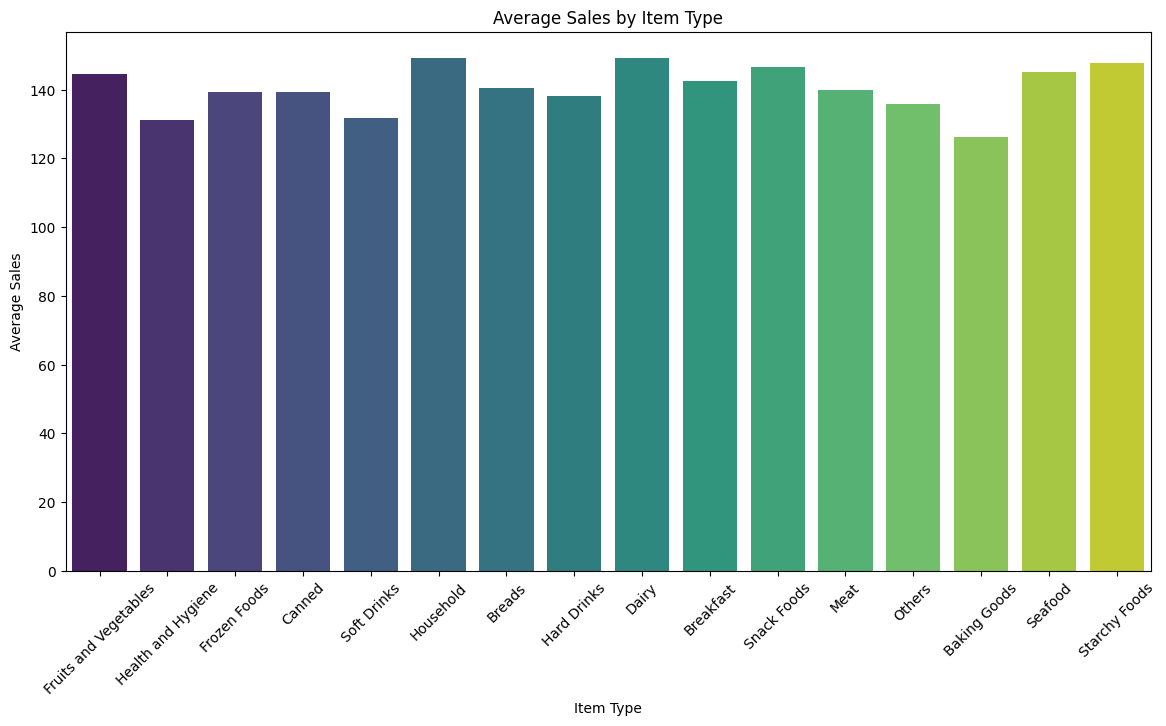

<ipython-input-118-ef2e4981ee02>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Item Fat Content', y='Sales', data=data, ci=None, palette='Set2')
<ipython-input-118-ef2e4981ee02>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Item Fat Content', y='Sales', data=data, ci=None, palette='Set2')


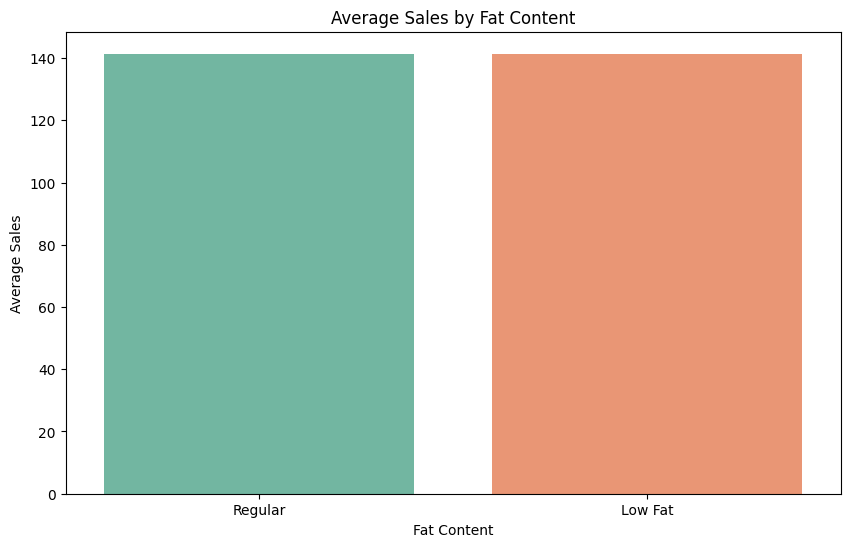

In [118]:
# Bar plot of average sales by item type
plt.figure(figsize=(14, 7))
sns.barplot(x='Item Type', y='Sales', data=data, ci=None, palette='viridis')
plt.xticks(rotation=45)
plt.title('Average Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Average Sales')
plt.show()

# Bar plot of average sales by fat content
plt.figure(figsize=(10, 6))
sns.barplot(x='Item Fat Content', y='Sales', data=data, ci=None, palette='Set2')
plt.title('Average Sales by Fat Content')
plt.xlabel('Fat Content')
plt.ylabel('Average Sales')
plt.show()


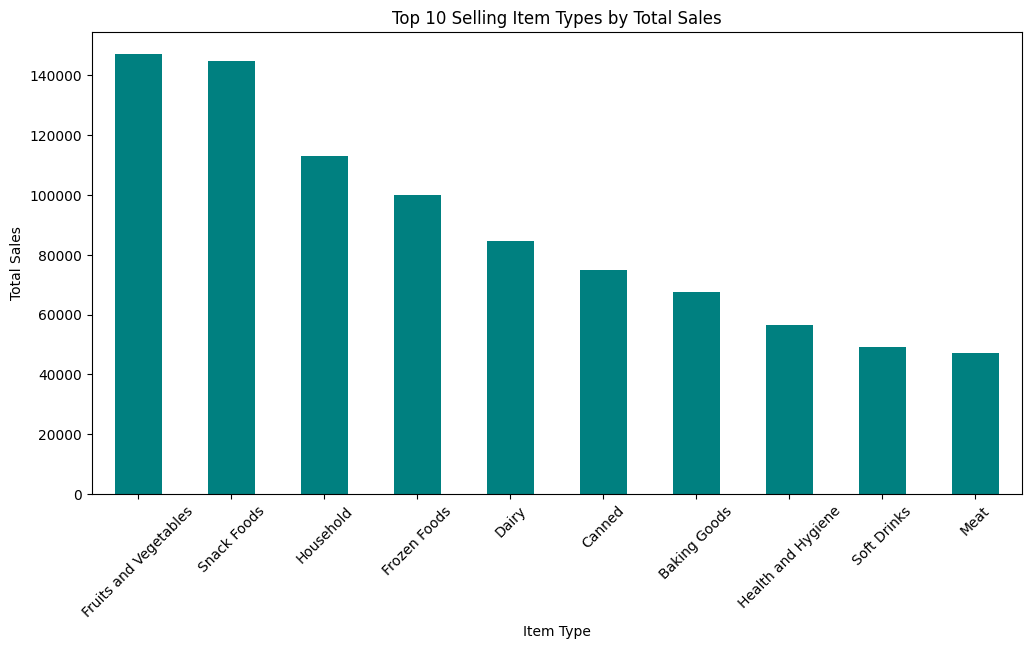

In [119]:
# Find top-selling items
top_selling_items = data.groupby('Item Type')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_selling_items.plot(kind='bar', color='teal')
plt.title('Top 10 Selling Item Types by Total Sales')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


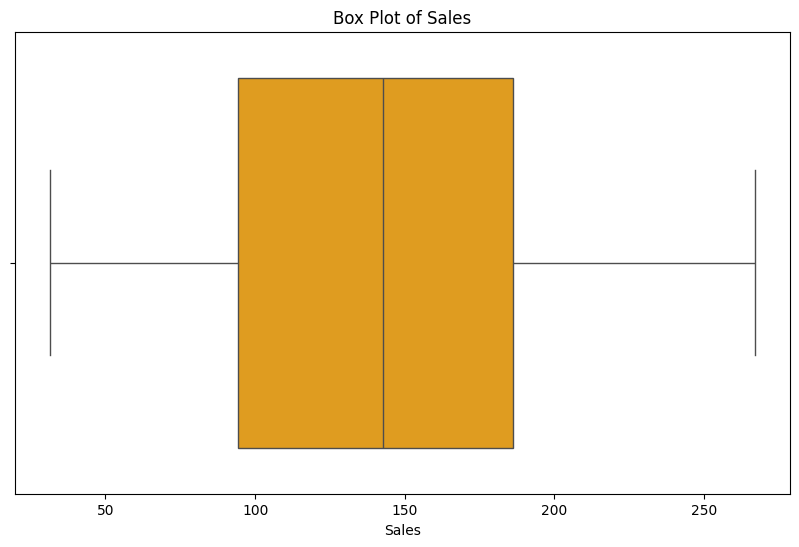

In [120]:
# Box plot to detect outliers in sales
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Sales'], color='orange')
plt.title('Box Plot of Sales')
plt.xlabel('Sales')
plt.show()


<ipython-input-121-ac581f0760d5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outlet Type', y='Sales', data=data, palette='Blues')


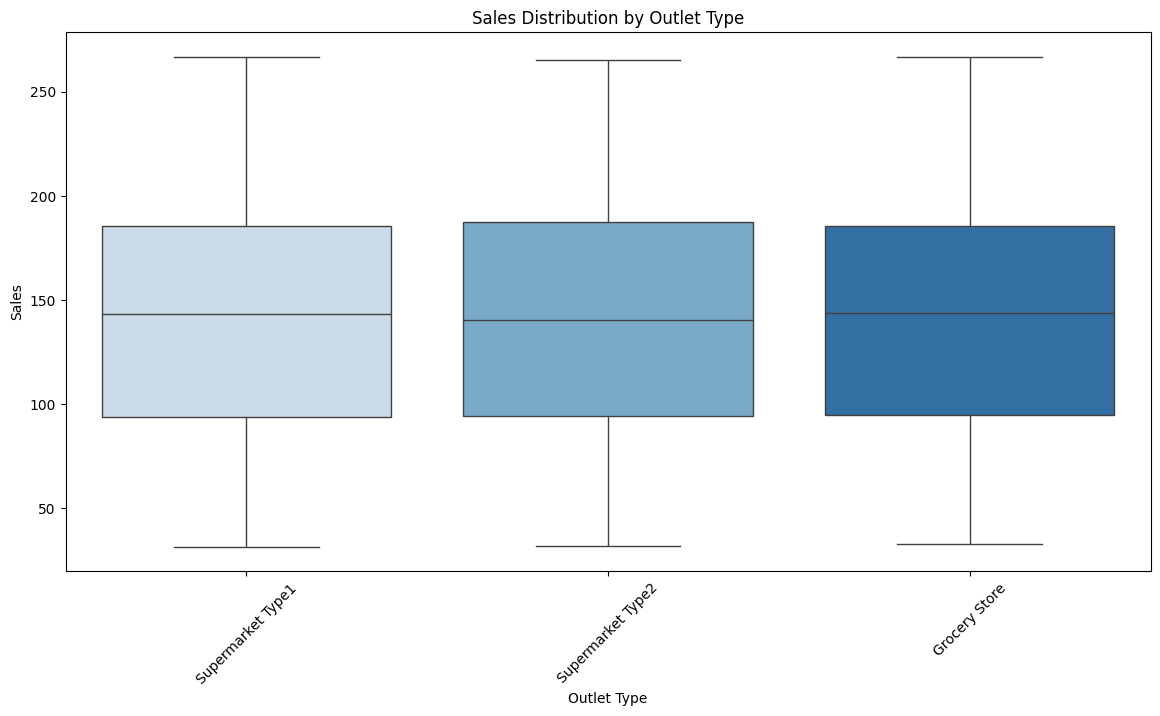

In [121]:
# Box plot for sales by outlet type
plt.figure(figsize=(14, 7))
sns.boxplot(x='Outlet Type', y='Sales', data=data, palette='Blues')
plt.title('Sales Distribution by Outlet Type')
plt.xlabel('Outlet Type')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()
